In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('P05.csv')
df

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,homeowner_tax,rent_amount,property_tax,fire_insurance,total
0,Sao Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Sao Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,Sao Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,Sao Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
8227,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
8228,Sao Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
8229,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390


PROBLEM 1

In [3]:
#1. Banyaknya data masing-masing kota tempat rumah berada.
df['city'].value_counts()

city
Sao Paulo         4273
Rio de Janeiro    1394
Porto Alegre       999
Belo Horizonte     916
Campinas           649
Name: count, dtype: int64

In [8]:
#2. Rata-rata biaya asuransi kebakaran per tahun.
df['fire_insurance'].mean()

46.45535171911068

In [10]:
#3. 5 rumah dengan luas tanah terbesar.
df.sort_values(['area'], ascending=[0])[0:5]

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,homeowner_tax,rent_amount,property_tax,fire_insurance,total
1810,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
4567,Sao Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
7114,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417
6757,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267
930,Sao Paulo,1000,4,7,4,10,acept,furnished,6000,15000,4900,191,26090


In [13]:
#4. Rumah yang sudah dilengkapi furnitur.
df.loc[df['furniture'] == "furnished"]

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,homeowner_tax,rent_amount,property_tax,fire_insurance,total
0,Sao Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
7,Sao Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
8,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
9,Sao Paulo,26,1,1,0,2,acept,furnished,470,2100,150,27,2747
12,Sao Paulo,55,1,1,1,2,acept,furnished,790,4200,224,54,5268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419
8226,Sao Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
8227,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
8229,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390


In [16]:
#5. Nilai korelasi antara pajak tanah dan pajak bangunan per tahun. Apakah berkorelasi lurus, terbalik, atau tidak berkolerasi? Jelaskan.
df['homeowner_tax'].corr(df['property_tax'])

0.007914200947346692

PROBLEM 2

In [24]:
#2. Ada berapa rumah di Porto Alegre dengan jumlah tempat parkir lebih dari 3?
r = df.loc[(df['city'] == 'Porto Alegre') & (df['parking_spaces']>3)]
len(r)

9

In [30]:
#2. Data rumah dengan biaya asuransi kebakaran per tahun terkecil.
imin = df['fire_insurance'].idxmin()
df[imin:imin+1]

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,homeowner_tax,rent_amount,property_tax,fire_insurance,total
6225,Campinas,50,1,1,0,8,acept,not furnished,300,550,0,3,853


In [43]:
#3. Ada berapa rumah yang mengizinkan membawa hewan peliharaan dan harga sewa pertahun di bawah rata-rata?
average_rent = df['rent_amount'].mean()
data = df.loc[(df['animal'] == 'acept') & (df['rent_amount']< average_rent)]
len(data)


4284

In [46]:
#4. Banyak rumah yang tidak memiliki tempat parkir untuk masing-masing kota.
data = df[df['parking_spaces'] == 0]
data['city'].value_counts()

city
Sao Paulo         800
Rio de Janeiro    619
Porto Alegre      381
Campinas          124
Belo Horizonte    121
Name: count, dtype: int64

In [53]:
#5. 5 data rumah dengan pajak bangunan per tahun tertinggi yang tidak mengizinkan membawa hewan peliharaan.
df[df['animal'] == 'not acept'].sort_values(['property_tax'], ascending=[0])[0:5]

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,homeowner_tax,rent_amount,property_tax,fire_insurance,total
5114,Sao Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
4105,Sao Paulo,300,4,5,5,6,not acept,not furnished,3500,1990,10830,26,16350
5737,Rio de Janeiro,170,3,1,1,10,not acept,not furnished,2888,5000,5404,65,13360
3063,Sao Paulo,500,4,7,6,5,not acept,not furnished,5400,5000,4000,64,14460
832,Sao Paulo,130,3,2,2,15,not acept,not furnished,1400,6200,4000,79,11680


PROBLEM 3

<Axes: ylabel='Frequency'>

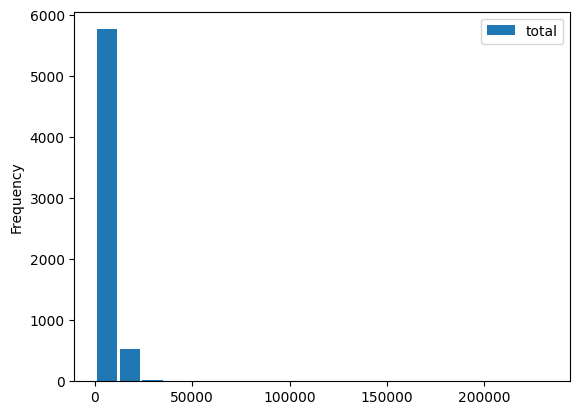

In [35]:
#1. Histogram distribusi harga sewa per tahun dari rumah yang mengizinkan membawa hewan peliharaan,dengan bins 20.
r = df.loc[df['animal'] == 'acept']
r[['total']].plot(kind='hist',bins=20,rwidth=0.9)

<Axes: title={'center': 'Persebaran Rumah berdasarkan Kota Domisili'}>

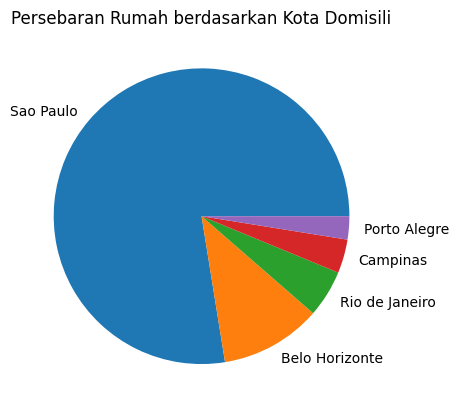

In [46]:
#2. Pie chart perbandingan banyaknya masing-masing kota tempat rumah berada dari rumah dengan kamar mandi lebih dari 3.
data = df[df['bathroom']>3]
data['city'].value_counts().plot(kind='pie', ylabel='',title='Persebaran Rumah berdasarkan Kota Domisili')

<Axes: xlabel='area', ylabel='property_tax'>

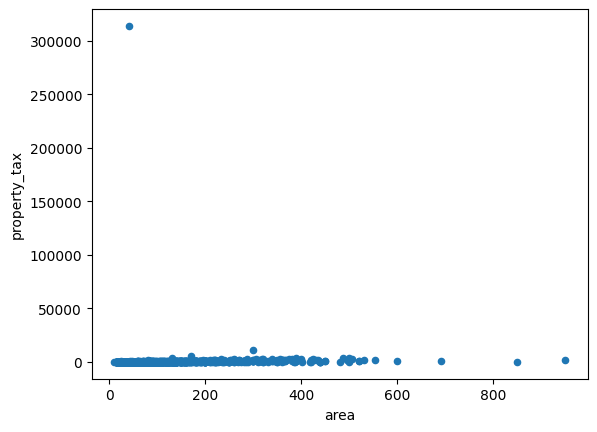

In [47]:
#3. Scatter plot dengan luas tanah sebagai x dan pajak bangunan sebagai y dari rumah yang tidak men-gizinkan membawa hewan peliharaan.
data = df[df['animal'] == 'not acept']
data.plot(kind='scatter', x='area', y='property_tax')

3619

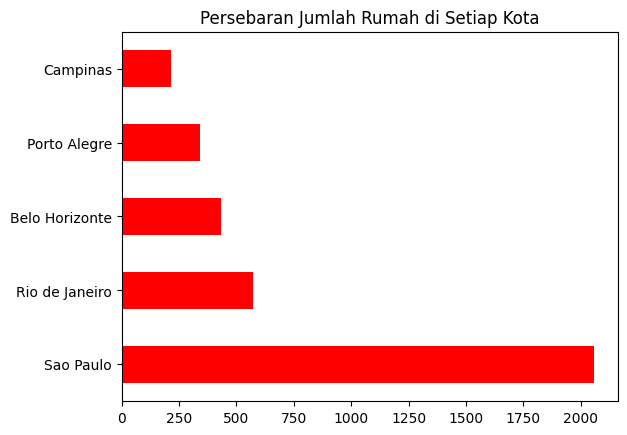

In [62]:
#4. Horizontal bar chart menggambarkan jumlah rumah di setiap kota dengan jumlah kamar tidur lebih dari 3 dan tepat 2 kamar mandi.
r = df.loc[(df['bathroom'] >3) | (df['bathroom'] == 2)]
r['city'].value_counts().plot(kind='barh',color='red', ylabel='', title='Persebaran Jumlah Rumah di Setiap Kota')
len(r)

<Axes: xlabel='furniture'>

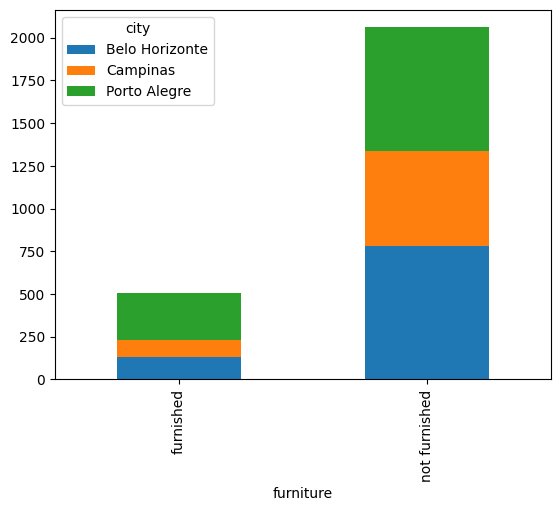

In [4]:
#5. Stacked bar chart dari rumah yang berada di kota ’Campinas’, ’Porto Alegre’, dan ’Belo Horizonte’ yang dilengkapi furnitur atau tidak sumbu x dan kota tempat rumah berada sebagai stacked y.
df[(df['city'] == 'Campinas') | (df['city'] == 'Porto Alegre')| (df['city'] == 'Belo Horizonte')].groupby(['furniture', 'city']).size().unstack().plot(kind='bar', stacked=True)